In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import pickle

In [2]:
df = pd.read_csv("training_set.csv", index_col='Unnamed: 0')

In [3]:

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression 

from sklearn.model_selection import GridSearchCV, KFold, train_test_split



In [4]:
X=df.drop(columns=['Y'])

In [5]:
y= df['Y']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# X_train.to_csv('X_train.csv')
# y_train.columns=['Unnamed: 0', 'y']
# y_train.to_csv('y_train.csv')
# X_val.to_csv('X_val.csv')
# y_val.columns=['Unnamed: 0', 'y']
# y_val.to_csv('y_val.csv')


(2932, 57)

In [14]:
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, roc_curve, confusion_matrix

In [15]:
from sklearn.ensemble import VotingClassifier

## We train a ensemble model based on trees since it does well on extremely non gaussian data with basic scaling. LGBM and Random forest do really well on moderately many features and around  3K rows

In [16]:
ec_model = VotingClassifier(estimators=[
         ('rf', RandomForestClassifier(n_estimators=100)), ('lgbm', LGBMClassifier()), ('et', ExtraTreesClassifier() )], voting='soft', weights=[1,1.5,1])

In [17]:
en_model = Pipeline([('Standardscaler', StandardScaler()), ('ensemble',ec_model)])

In [18]:
en_model.fit(X_train, y_train)

Pipeline(steps=[('Standardscaler', StandardScaler()),
                ('ensemble',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('lgbm', LGBMClassifier()),
                                              ('et', ExtraTreesClassifier())],
                                  voting='soft', weights=[1, 1.5, 1]))])

In [32]:
filename = 'finalized_model_aryaAI.sav'
pickle.dump(en_model, open(filename, 'wb'))

In [19]:
y_pred = en_model.predict(X_val)

## Confusion matrix

In [20]:
cm=confusion_matrix(y_val, y_pred)

In [21]:
cm.astype(int)

array([[584,  14],
       [ 22, 358]])

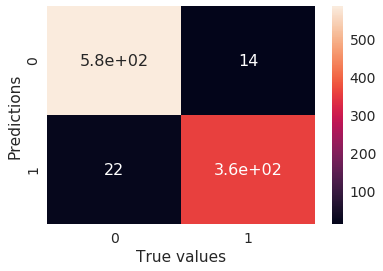

In [39]:
df_cm = pd.DataFrame(cm.astype(int), range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('True values')
plt.ylabel('Predictions')


plt.show()

## Metrics are analyzed for the predictions. Here it seems accuracy is a good prediction

In [23]:
def metric_analysis(y_val, y_pred):
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f"Accuracy : {round(accuracy,4)} || Recall : {round(recall,4)} || f1_Score : {round(f1,4)} || roc_auc_score :{round(roc_auc,4)}")

In [24]:
metric_analysis(y_val, y_pred)

Accuracy : 0.9632 || Recall : 0.9421 || f1_Score : 0.9521 || roc_auc_score :0.9593


In [43]:
# # install
# !pip3 install pipreqs

# # Run in current directory
# !python3 -m  pipreqs.pipreqs .

## Read and predict the test dataset

In [47]:
X_test = pd.read_csv('test_set.csv', index_col='Unnamed: 0')

In [50]:
y_test = en_model.predict(X_test)


In [53]:
y_test = pd.DataFrame(y_test, columns=['y'])
y_test.to_csv('y_test.csv')

In [56]:
y_test = pd.read_csv('y_test.csv', index_col='Unnamed: 0')